# Exercises II

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

In [1]:
import pandas as pd
import numpy as np
import os
from env import get_db_url
import wrangle as w

### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


In [2]:
# gets the requested dataframe from mysql zillow
def get_zillow_2017():
    filename = "zillow_2017.csv"
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        query = """
        SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        FROM properties_2017
        JOIN propertylandusetype
        USING (propertylandusetypeid)
        WHERE propertylandusetypeid like '261';"""
        connection = get_db_url("zillow")
        df = pd.read_sql(query, connection)
        df.to_csv(filename, index=False)
    return df

In [3]:
df = get_zillow_2017()

### 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.


In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
# Lots of nulls, why?
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
df.shape

(2152863, 7)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [9]:
# renamed columns for personal pref
df.rename(columns={df.columns[0]: 'num_bedrooms', df.columns[1]: 'num_bathrooms', df.columns[2]: 'finished_sqft', df.columns[3]: 'tax_value'}, inplace=True)

In [10]:
df.head()

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [11]:
# dropped nan from yearbuilt
df.dropna(subset= ['yearbuilt'], inplace=True)

In [12]:
df.isnull().sum()

num_bedrooms        7
num_bathrooms       7
finished_sqft     607
tax_value         118
yearbuilt           0
taxamount        2708
fips                0
dtype: int64

In [13]:
# unfinished houses arent needed
df.dropna(subset= ['finished_sqft'], inplace=True)

In [14]:
df.isnull().sum()

num_bedrooms        3
num_bathrooms       3
finished_sqft       0
tax_value         113
yearbuilt           0
taxamount        2666
fips                0
dtype: int64

In [15]:
# no rooms doesnt make a good house, dropped nan
df.dropna(subset= ['num_bedrooms', 'num_bathrooms'], inplace=True)

In [16]:
# looked at taxamount to see why it was nan
# less than 1% were nan so just dropped them
df[df.taxamount.isnull()]

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips
45,1.0,1.0,755.0,107608.0,1921.0,NaN,6037.0
1033,3.0,3.0,2798.0,128281.0,1972.0,NaN,6037.0
1626,2.0,1.0,812.0,223702.0,1949.0,NaN,6037.0
2607,3.0,2.0,1199.0,203005.0,1953.0,NaN,6037.0
2737,3.0,2.0,1238.0,473000.0,1950.0,NaN,6037.0
...,...,...,...,...,...,...,...
2147189,0.0,0.0,936.0,32585.0,1913.0,NaN,6037.0
2147705,2.0,1.0,928.0,111100.0,1921.0,NaN,6037.0
2149353,0.0,0.0,324.0,15659.0,1946.0,NaN,6037.0
2151358,2.0,1.5,1482.0,169038.0,1954.0,NaN,6059.0


In [17]:
df.head()

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [18]:
#Wanted to see what locations were different to help with my decision to drop rows with nan for taxamount
df.fips.value_counts()

fips
6037.0    1427676
6059.0     552255
6111.0     162985
Name: count, dtype: int64

In [19]:
# was trying to see percentage in case I decided to impute values into taxamount
df['tax_rate'] = df['taxamount'] / df['tax_value']

In [20]:
df.head(15)

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips,tax_rate
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,0.023417
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,0.012085
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,0.012253
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,0.017192
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,0.036874
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0,0.011562
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,0.014946
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,0.013337
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0,0.013323
21,4.0,4.0,4144.0,1303522.0,2016.0,14820.10,6037.0,0.011369


In [21]:
# decided to drop all na values from the rest since the results were a very low percentage of the data
df.dropna(inplace=True)

In [22]:
# dropped the column i made for visual
df.drop(columns= 'tax_rate', inplace=True)

In [23]:
df.shape

(2140235, 7)

In [24]:
df.describe()

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [25]:
df.isnull().sum()

num_bedrooms     0
num_bathrooms    0
finished_sqft    0
tax_value        0
yearbuilt        0
taxamount        0
fips             0
dtype: int64

In [26]:
# checking for nulls one last time
w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,dtype
6,fips,3,"[6037.0, 6059.0, 6111.0]",0,float64
0,num_bedrooms,19,"[4.0, 3.0, 0.0, 5.0, 2.0, 1.0, 6.0, 7.0, 8.0, ...",0,float64
1,num_bathrooms,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,float64
4,yearbuilt,153,"[2005.0, 2011.0, 1926.0, 1972.0, 1973.0, 1960....",0,float64
2,finished_sqft,10557,"[3633.0, 1620.0, 2077.0, 1200.0, 171.0, 203.0,...",0,float64
3,tax_value,588178,"[296425.0, 847770.0, 646760.0, 5328.0, 6920.0,...",0,float64
5,taxamount,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163...",0,float64


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

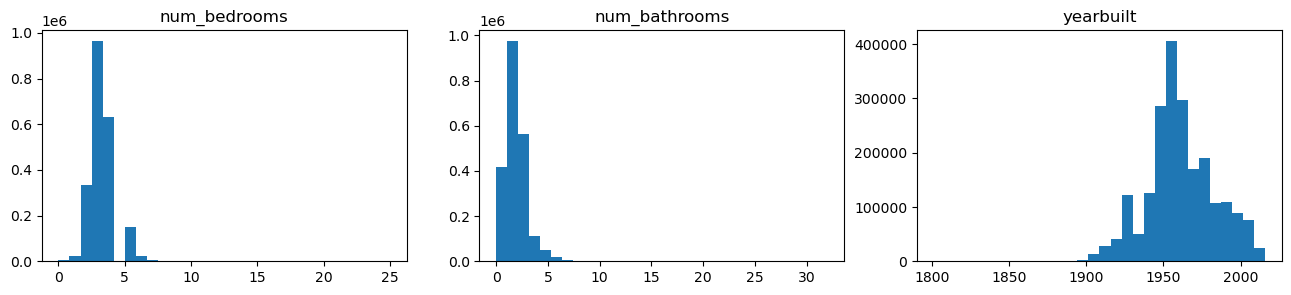

In [33]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['num_bedrooms', 'num_bathrooms', 'yearbuilt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,3, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=30)

    # Hide gridlines.
    plt.grid(False)


### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [34]:
# pulls the zillow csv and cleans and returns cleaned df with no NaN values
def wrangle_zillow(df):
    file = 'zillow_2017.csv'

    df = pd.read_csv(file)

    df = df.dropna()

    df.rename(columns={df.columns[0]: 'num_bedrooms', df.columns[1]: 'num_bathrooms', df.columns[2]: 'finished_sqft', df.columns[3]: 'tax_value'}, inplace=True)

    return df

In [35]:
df_zillow = wrangle_zillow(df)

In [36]:
df_zillow.head()

,num_bedrooms,num_bathrooms,finished_sqft,tax_value,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [37]:
df_zillow.shape

(2140235, 7)